<a href="https://colab.research.google.com/github/19NE1A1233/CKD/blob/main/Ckd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
#import libraries
import glob 
from keras.models import Sequential,load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

In [34]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('chronic  kidney.csv')
df.head(10)

Saving chronic  kidney.csv to chronic  kidney (2).csv


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [35]:
df.shape

(400, 26)

In [36]:
columns_to_retain = ['sg','al','sc','hemo','pcv','htn','classification']
df = df.drop( [col for col in df.columns if not col in columns_to_retain] , axis=1 )
df = df.dropna(axis=0)

In [37]:
for column in df.columns:
    if df[column].dtype == np.number:
      continue
    df[column] = LabelEncoder().fit_transform( df[column] )


<ipython-input-37-aeba061634c7>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-37-aeba061634c7>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:
<ipython-input-37-aeba061634c7>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [38]:
df.head(10)

,sg,al,sc,hemo,pcv,htn,classification
0,1.020,1.0,1.2,15.4,28,1,0
1,1.020,4.0,0.8,11.3,22,0,0
2,1.010,2.0,1.8,9.6,15,0,0
3,1.005,4.0,3.8,11.2,16,1,0
4,1.010,2.0,1.4,11.6,19,0,0
5,1.015,3.0,1.1,12.2,23,1,0
6,1.010,0.0,24.0,12.4,20,0,0
7,1.015,2.0,1.1,12.4,28,0,0
8,1.015,3.0,1.9,10.8,17,1,0
9,1.020,2.0,7.2,9.5,13,1,0


In [39]:
x = df.drop(['classification'],axis=1)
y = df['classification']

In [40]:
x_scaler = MinMaxScaler()
x_scaler.fit(x)
column_names = x.columns
x[column_names] = x_scaler.transform(x)

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, shuffle=True)


In [42]:
model = Sequential()
model.add( Dense(256, input_dim= len(x.columns), kernel_initializer=k.initializers.random_normal(seed=13), activation='relu'))
model.add( Dense(1, activation='hard_sigmoid'))


In [43]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [44]:
history = model.fit(x_train, y_train, epochs=2000, batch_size= x_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 1s 621ms/step - loss: 0.7017 - accuracy: 0.5109
Epoch 2/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.6939 - accuracy: 0.5109
Epoch 3/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6863 - accuracy: 0.5066
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6787 - accuracy: 0.5153
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6713 - accuracy: 0.8428
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6640 - accuracy: 0.8865
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6569 - accuracy: 0.8821
Epoch 8/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6499 - accuracy: 0.8777
Epoch 9/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6429 - accuracy: 0.8777
Epoch 10/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6360 - accuracy: 0.8777
Epoch 11

Text(0.5, 0, 'epoch')

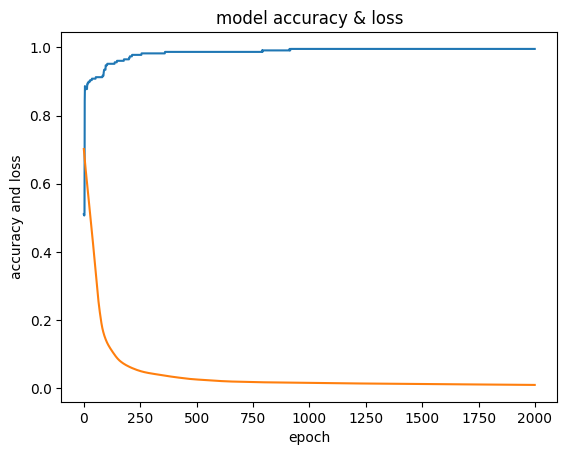

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy & loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')


In [47]:
print('shape of traning data:',x_train.shape)
print('shape of test data:',x_test.shape)

shape of traning data: (229, 6)
shape of test data: (58, 6)


In [48]:
pred = model.predict(x_test)
pred = [1 if y>=0.5 else 0 for y in pred]
pred
print('Original : {0}'.format(", ".join(str(x) for x in y_test)))
print('Predicted : {0}'.format(", ".join(str(x) for x in pred)))


2/2 [==============================] - 0s 4ms/step
Original : 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0
Predicted : 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0


In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

knn_acc = accuracy_score(y_test, knn.predict(x_test))

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(x_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(x_test))}")


Training Accuracy of KNN is 0.9912663755458515
Test Accuracy of KNN is 0.9827586206896551 

Confusion Matrix :- 
[[35  1]
 [ 0 22]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.96      1.00      0.98        22

    accuracy                           0.98        58
   macro avg       0.98      0.99      0.98        58
weighted avg       0.98      0.98      0.98        58



In [51]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(x_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(x_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(x_test))}")


Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 1.0 

Confusion Matrix :- 
[[36  0]
 [ 0 22]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        22

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [52]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(learning_rate = 1)
lgbm.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of lgbm classifier

lgbm_acc = accuracy_score(y_test, lgbm.predict(x_test))

print(f"Training Accuracy of LGBM Classifier is {accuracy_score(y_train, lgbm.predict(x_train))}")
print(f"Test Accuracy of LGBM Classifier is {lgbm_acc} \n")

print(f"{confusion_matrix(y_test, lgbm.predict(x_test))}\n")
print(classification_report(y_test, lgbm.predict(x_test)))



Training Accuracy of LGBM Classifier is 1.0
Test Accuracy of LGBM Classifier is 1.0 

[[36  0]
 [ 0 22]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        22

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [53]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(x_train, y_train)

# accuracy score, confusion matrix and classification report of random forest

rd_clf_acc = accuracy_score(y_test, rd_clf.predict(x_test))
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(x_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(x_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(x_test))}")


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 1.0 

Confusion Matrix :- 
[[36  0]
 [ 0 22]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        22

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



In [54]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'LGBM Classifier', 'Random Forest Classifier'],
    'Score' : [knn_acc, dtc_acc, lgbm_acc, rd_clf_acc]
})

In [55]:
models.sort_values(by = 'Score', ascending = False)


,Model,Score
1,Decision Tree Classifier,1.000000
2,LGBM Classifier,1.000000
3,Random Forest Classifier,1.000000
0,KNN,0.982759
